In [1]:
pip install scikit-image



  Using cached scikit_image-0.20.0-cp39-cp39-win_amd64.whl (23.9 MB)
  Using cached networkx-3.0-py3-none-any.whl (2.0 MB)
  Using cached PyWavelets-1.4.1-cp39-cp39-win_amd64.whl (4.2 MB)
  Using cached imageio-2.27.0-py3-none-any.whl (3.4 MB)
  Using cached lazy_loader-0.2-py3-none-any.whl (8.6 kB)


You should consider upgrading via the 'C:\Users\Compact\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from time import time
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

%matplotlib inline



In [21]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape


X = lfw_people.data
n_features = X.shape[1]

y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


'Hugo Chavez'

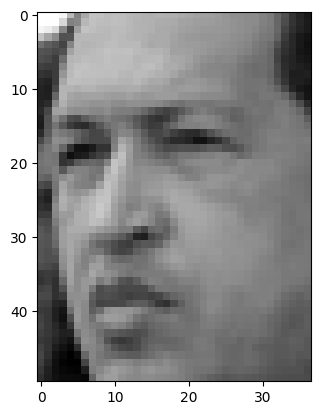

In [47]:
plt.imshow(X[0].reshape((h, w)), cmap=plt.cm.gray)
lfw_people.target_names[y[0]]




'Hugo Chavez'

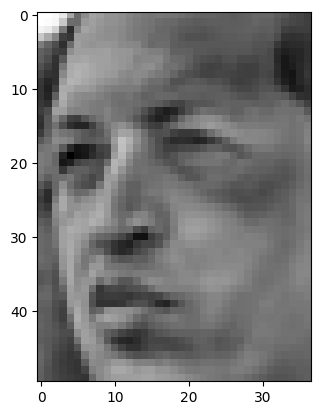

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [51]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

C:\Users\Compact\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Compact\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Accuracy score for best estimator 0.8540372670807453
                   precision    recall  f1-score   support

     Ariel Sharon       0.83      0.79      0.81        19
     Colin Powell       0.89      0.76      0.82        55
  Donald Rumsfeld       0.65      0.80      0.71        25
    George W Bush       0.90      0.93      0.92       142
Gerhard Schroeder       0.80      0.90      0.85        31
      Hugo Chavez       0.93      0.88      0.90        16
       Tony Blair       0.80      0.71      0.75        34

         accuracy                           0.85       322
        macro avg       0.83      0.82      0.82       322
     weighted avg       0.86      0.85      0.85       322

seconds to grid search and predict the test set 21.5


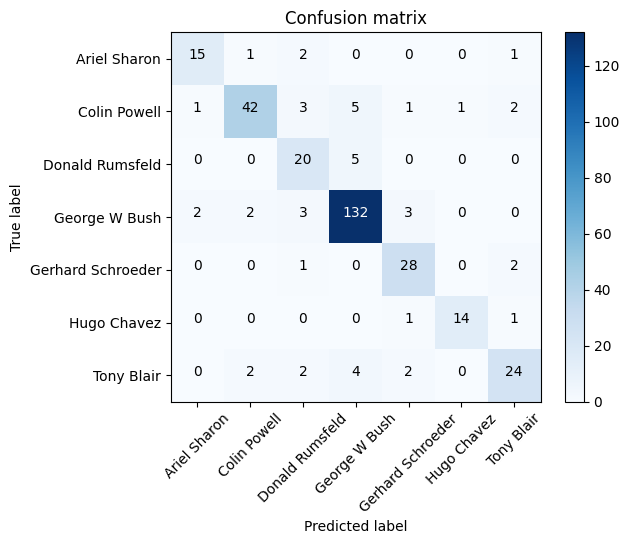

In [54]:
t0 = time()

face_pipeline = Pipeline(steps=[('PCA', PCA(n_components=200)), ('logistic', logreg)])

pipe_param_grid = {'logistic__C': [1e-2, 1e-1,1e0,1e1, 1e2]}
clf = GridSearchCV(face_pipeline, pipe_param_grid)
clf = clf.fit(X_train, y_train)
best_clf = clf.best_estimator_


y_pred = best_clf.predict(X_test)

print ("Accuracy score for best estimator",accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=target_names))
plot_confusion_matrix(confusion_matrix(y_test, y_pred, labels=range(n_classes)), target_names)
print ("seconds to grid search and predict the test set",round((time() - t0), 1))
